### Today we are going to perform the simple classification of the amazon reviews' sentiment.

### Please, download the dataset amazon_baby.csv.

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
from sklearn.linear_model import LogisticRegression

In [80]:
baby_df = pd.read_csv('amazon_baby.csv')
baby_df.head()

,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5


## Exercise 1 (data preparation)
a) Remove punctuation from reviews using the given function.   
b) Replace all missing (nan) revies with empty "" string.  
c) Drop all the entries with rating = 3, as they have neutral sentiment.   
d) Set all positive ($\geq$4) ratings to 1 and negative($\leq$2) to -1.

## Data preparation

We need to remove punctuation first in order to avoid this error: AttributeError: 'float' object has no attribute 'translate'. It's worth to remember to not run cell d) after 1st run without running previous cells as it operates on changed data after that. All tests below indicate that data is prepared successfully

In [81]:
def remove_punctuation(text):
    import string
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

In [82]:
#b)
baby_df['review'] = baby_df['review'].fillna("")

#short test:
baby_df["review"][38] == baby_df["review"][38]

True

In [83]:
#a)
baby_df['review'] = baby_df['review'].apply(remove_punctuation)

#short test: 
baby_df["review"][4] == 'All of my kids have cried nonstop when I tried to ween them off their pacifier until I found Thumbuddy To Loves Binky Fairy Puppet  It is an easy way to work with your kids to allow them to understand where their pacifier is going and help them part from itThis is a must buy book and a great gift for expecting parents  You will save them soo many headachesThanks for this book  You all rock'
remove_punctuation(baby_df["review"][4]) == 'All of my kids have cried nonstop when I tried to ween them off their pacifier until I found Thumbuddy To Loves Binky Fairy Puppet  It is an easy way to work with your kids to allow them to understand where their pacifier is going and help them part from itThis is a must buy book and a great gift for expecting parents  You will save them soo many headachesThanks for this book  You all rock'

True

In [84]:
#c)
baby_df = baby_df[baby_df.rating != 3]

#short test:
sum(baby_df["rating"] == 3)

0

In [85]:
def modify_rating(rate):
    if rate >= 4:
        return 1
    if rate <= 2:
        return -1

In [86]:
#d) 
baby_df['rating'] = baby_df['rating'].apply(modify_rating)

#short test:
sum(baby_df["rating"]**2 != 1)
print("Number of rows: ", baby_df.shape[0])
print("Number of 1: ", sum(baby_df["rating"] == 1))
print("Number of -1: ", sum(baby_df["rating"] == -1))
print("Total: ", sum(baby_df["rating"] == 1) + sum(baby_df["rating"] == -1))

Number of rows:  166752
Number of 1:  140259
Number of -1:  26493
Total:  166752


,name,review,rating
1,Planetwise Wipe Pouch,it came early and was not disappointed i love ...,1
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,1
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase I h...,1
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried nonstop when I tried...,1
5,Stop Pacifier Sucking without tears with Thumb...,When the Binky Fairy came to our house we didn...,1
6,A Tale of Baby's Days with Peter Rabbit,Lovely book its bound tightly so you may not b...,1
7,"Baby Tracker&reg; - Daily Childcare Journal, S...",Perfect for new parents We were able to keep t...,1
8,"Baby Tracker&reg; - Daily Childcare Journal, S...",A friend of mine pinned this product on Pinter...,1
9,"Baby Tracker&reg; - Daily Childcare Journal, S...",This has been an easy way for my nanny to reco...,1
10,"Baby Tracker&reg; - Daily Childcare Journal, S...",I love this journal and our nanny uses it ever...,1


## CountVectorizer
In order to analyze strings, we need to assign them numerical values. We will use one of the simplest string representation, which transforms strings into the $n$ dimensional vectors. The number of dimensions will be the size of our dictionary, and then the values of the vector will represent the number of appereances of the given word in the sentence.

In [91]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
reviews_train_example = ["We like apples",
                   "We hate oranges",
                   "I adore bananas",
                   "We like like apples and oranges",
                   "They dislike bananas"]

X_train_example = vectorizer.fit_transform(reviews_train_example)

print(vectorizer.get_feature_names_out())
print(X_train_example.todense())



['adore' 'and' 'apples' 'bananas' 'dislike' 'hate' 'like' 'oranges' 'they'
 'we']
[[0 0 1 0 0 0 1 0 0 1]
 [0 0 0 0 0 1 0 1 0 1]
 [1 0 0 1 0 0 0 0 0 0]
 [0 1 1 0 0 0 2 1 0 1]
 [0 0 0 1 1 0 0 0 1 0]]


In [92]:
reviews_test_example = ["They like bananas",
                   "We hate oranges bananas and apples",
                   "We love bananas"] #New word!

X_test_example = vectorizer.transform(reviews_test_example)

print(X_test_example.todense())

[[0 0 0 1 0 0 1 0 1 0]
 [0 1 1 1 0 1 0 1 0 1]
 [0 0 0 1 0 0 0 0 0 1]]


We should acknowledge few facts. Firstly, CountVectorizer does not take order into account. Secondly, it ignores one-letter words (this can be changed during initialization). Finally, for test values, CountVectorizer ignores words which are not in it's dictionary.

## Exercise 2 
a) Split dataset into training and test sets.     
b) Transform reviews into vectors using CountVectorizer. 

## Comment

I used traditional ratio of training set to test set. I made a mistake of using fit_transform on test data which resulted in using different vectorizers for those datasets. This, as one might expect, produced quite wrong results and cost me some time as I thought that the problem was with Logistic Regression model. To sum up, when debugging it is worth to take a look at possibility of things going wrong at data preparation first.

In [156]:
#a)
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(baby_df, test_size=0.2, random_state=44)

In [157]:
#b)
vectorizer = CountVectorizer()

x_train = vectorizer.fit_transform(train_df['review'])
x_test = vectorizer.transform(test_df['review'])
y_train = train_df['rating']
y_test = test_df['rating']

In [158]:
feature_names = vectorizer.get_feature_names_out()
print(feature_names)

for feature in feature_names:
    print(feature)

['00' '000' '001' ... 'zzzzzz' 'zzzzzzz' 'zzzzzzzzzzz']
00
000
001
001cm
002
01
010
010204
0104
010613do
01082013
012
012010
01202012
01252013
012m
013005
01302012my
017
0182196
02
020
02060
0207
02072
02090
021
02100
02172014after
02180
021914
021meal
02220
024
025
02700
03
030
030611fantastic
032010
034
036
03lbs
03mo
03mo36mo612mo
03months
03mosbut
04
0409
0427
04302013
046060us
05
050
051
052
05202013
05my
05oz
06
06182012my
0635
065
069
06m
06mfor
06mo
06mosit
06mths
07
07122011by
07182013
072012
075
075cm
08
0804
080412
0813
08132011
08142013so
081713
08280
08all
08m
08while
09
09082009
09092011
09202013our
09282012
093
093010c
097
099
0bviously
0fast
0good
0gt
0i
0m
0ne
0negatives
0prosneutrals
0r
0star
0the
0up
0ver
0z
10
100
1000
10000
100000
1000000000000
10000cons
10000would
1000ft
1000ma
1000s
1000x
1001
10010
100101
100112
100113i
10012telephone
100130
10014
100150
10015000
1002
100200
100240v
1003
100300
10034
1004
1005
1006
1007
1008
100also
100as
100better
100cotton
100

stackunstack
stacrobats
stad
stadge
stadium
stadiums
staff
staffstill
stag
stage
stage1
stage2
stage34
stageage
stageassembly
staged
stagefirst
stagei
stageim
stageit
stageits
stageour
stager
stagerecommended
stages
stages1
stagesages
stagesassy
stagesigned
stagesoverall
stagespecifics
stagestarting
stagesthe
stageswell
stagethe
stagger
staggered
staging
stagnant
stagnantit
stagnate
staid
staight
staightened
stain
stainable
staincant
staindirt
stained
stainedand
staineddirty
staineddoesnt
stainedruined
stainedthe
stainedyes
staines
stainess
stainfinish
stainfree
staini
staininducing
staining
staininglove
stainingthey
stainingupdatethe
stainit
stainless
stainlesssteel
stainlss
stainprone
stainresistant
stains
stains8226
stainscons
stainshe
stainsi
stainsits
stainsmy
stainso
stainssmellsyucky
stainsso
stainsthe
stainsthere
stainsthis
stainswe
staintreat
staintreated
staintreating
stainwater
stainwise
stainworthy
staionary
stair
staircase
staircasehallway
staircaseif
staircaseprosit
stair

## Exercise 3 
a) Train LogisticRegression model on training data (reviews processed with CountVectorizer, ratings as they were).   
b) Print 10 most positive and 10 most negative words.

## Comment
I tried using 'sag' and 'saga' solvers as I had read that they are faster for larger datasets but in this case default solver preformed better. I also checked how number of iterations would improve selection for negative and positive words. As I expected the more iterations the better suited words were found.

In [185]:
#a)
model = LogisticRegression(max_iter=100)
model.fit(x_train, y_train)


C:\Users\maury\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [186]:
coefficients = model.coef_[0]
features_and_coefficients = list(zip(feature_names, coefficients))
features_and_coefficients.sort(key=lambda x: x[1])

print("10 most positive words:")
for feature, coefficient in features_and_coefficients[-10:]:
    print(f"{feature}: {coefficient}")
print("\n")
print("10 most negative words:")
for feature, coefficient in features_and_coefficients[:10]:
    print(f"{feature}: {coefficient}")

10 most positive words:
downside: 1.742471511127027
perfect: 1.7802166314405732
amazing: 1.7813376130041245
negative: 1.84687274247643
satisfied: 1.9127640537686645
complaints: 1.9850897463012276
worry: 2.057465124755946
awesome: 2.0910141313003883
pleased: 2.1294711841136795
excellent: 2.2348855732725244


10 most negative words:
worst: -3.2898865698949247
disappointing: -3.1748821714282776
poorly: -2.888599677398656
concept: -2.4380763033709343
worthless: -2.402407144643278
useless: -2.3722735932192816
shame: -2.277702367143093
theory: -2.2162469284423096
returning: -2.184565963890166
terrible: -2.1812899771514376


In [187]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

C:\Users\maury\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [188]:
#b)
coefficients = model.coef_[0]
features_and_coefficients = list(zip(feature_names, coefficients))
features_and_coefficients.sort(key=lambda x: x[1])

print("10 most positive words:")
for feature, coefficient in features_and_coefficients[-10:]:
    print(f"{feature}: {coefficient}")
print("\n")
print("10 most negative words:")
for feature, coefficient in features_and_coefficients[:10]:
    print(f"{feature}: {coefficient}")
#hint: model.coef_, vectorizer.get_feature_names()

10 most positive words:
penny: 1.8834294260351288
minor: 1.8936673557778108
skeptical: 1.9068572652438214
amazed: 1.907582994102059
excellent: 1.9231829798275208
pleasantly: 1.961712753076683
ply: 1.9671377430694026
downside: 2.0177326001894826
thankful: 2.12684267506296
rich: 2.2098162606681098


10 most negative words:
dissapointed: -2.907026694920089
worst: -2.69123917138577
worthless: -2.6463729744587168
disappointing: -2.6109058126404134
useless: -2.522647831410258
nope: -2.500515096077121
theory: -2.419641335159553
poorly: -2.409420546956633
ineffective: -2.326029696980818
shame: -2.3069951205366412


## Exercise 4 
a) Predict the sentiment of test data reviews.   
b) Predict the sentiment of test data reviews in terms of probability.   
c) Find five most positive and most negative reviews.   
d) Calculate the accuracy of predictions.

## Comment
Predictions are binary - they indicate whether each review is classified as positive or negative. As shown in d) 93.23% answers were correct.

In [220]:
#a)
predictions = model.predict(x_test)

## Comment
predict_proba() is used to predict the class probabilities - the corresponding output of predict_proba() will contain the corresponding probabilities. Distribution of probability scores shows that model classifies instances of both classes well.

In [195]:
#b)
probabilities = model.predict_proba(x_test)
print(probabilities)
#hint: model.predict_proba()

[[1.07427919e-05 9.99989257e-01]
 [9.99999995e-01 5.09458714e-09]
 [6.18043441e-05 9.99938196e-01]
 ...
 [8.08069035e-05 9.99919193e-01]
 [1.84830173e-01 8.15169827e-01]
 [3.04804903e-02 9.69519510e-01]]


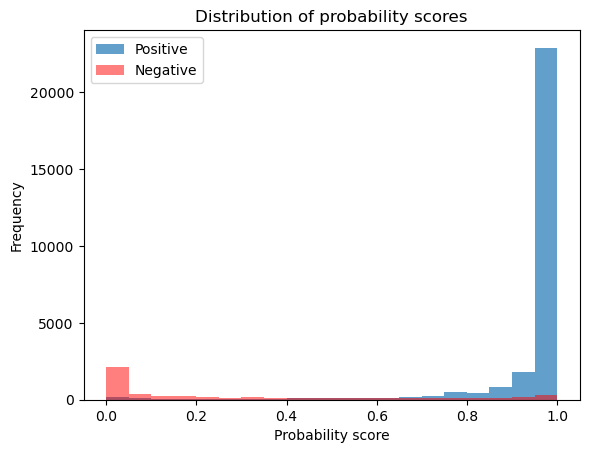

In [229]:
positive_probabilities = probabilities[:, 1][y_test == 1]
negative_probabilities = probabilities[:, 1][y_test == -1]

plt.hist(positive_probabilities, bins=20, label='Positive', alpha=0.7)
plt.hist(negative_probabilities, bins=20, label='Negative', color='red', alpha=0.5)
plt.xlabel('Probability score')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of probability scores')
plt.show()

## Comment
Model seems to classify reviews right.

In [237]:
#c) 
probs_reviews = list(zip(predictions, test_df['review']))
probs_reviews.sort(key=lambda x: x[0])

num = 0
print("Most negative reviews:")
for i in probs_reviews[:5]:
    num += 1
    print(f"{num})\n {i[1]}\n")

print() 

num = 0
print("Most positive reviews:")
for i in probs_reviews[-5:]:
    num += 1
    print(f"{num})\n {i[1]}\n")
#hint: use the results of b)

Most negative reviews:
1)
 We were given this for a gift at my baby shower I was excited with all of the features it had and I couldnt wait for my little lady to be born so I can start using it When she was born and we got it connected it worked For about a week The monitor wouldnt hold a charge for more than about 20 minutes So I kept it plugged in And we were in the process of cleaning the house and it went missing my fault not manufactures I ordered a new one Got charged for the product and shipping Thats ok because it was my fault that it went missing WELL they sent the wrong part And the one they sent felt like it came from the dollar tree I thought it was going to break just by holding it So I called to get them to send the right part Left a message Never got a call back I called back no one answered Again and again Left another message all in 2 weeks time I finally got ahold of someone this week They resent the RIGHT product this time Got it in Excited to finally get that worst 

In [238]:
#d) 
from sklearn.metrics import accuracy_score

print("Accuracy of predictions: ", accuracy_score(y_test, predictions))

Accuracy of predictions:  0.9323258672903362


## Exercise 5
In this exercise we will limit the dictionary of CountVectorizer to the set of significant words, defined below.


a) Redo exercises 2-5 using limited dictionary.   
b) Check the impact of all the words from the dictionary.   
c) Compare accuracy of predictions and the time of evaluation.

## Comment
This model works differently and performs than previous one. With the same number of max iterations it has lower accuracy (~87% vs ~93%) but works much faster - all due to limited dictionary. It means that it can be worth to cross least siginificant words out to speed up the process (especially when we work on huge datasets), as we can see when comparing times at the end.

In [278]:
significant_words = ['love','great','easy','old','little','perfect','loves','well','able','car','broke','less','even','waste','disappointed','work','product','money','would','return']

In [279]:
#a)
vectorizer_second = CountVectorizer()
vectorizer_second.fit_transform(significant_words)

x_train_second = vectorizer_second.transform(train_df['review'])
x_test_second = vectorizer_second.transform(test_df['review'])

In [280]:
feature_names = vectorizer_second.get_feature_names_out()
print(feature_names)

['able' 'broke' 'car' 'disappointed' 'easy' 'even' 'great' 'less' 'little'
 'love' 'loves' 'money' 'old' 'perfect' 'product' 'return' 'waste' 'well'
 'work' 'would']


In [281]:
model_second = LogisticRegression(max_iter=1000)
model_second.fit(x_train_second, y_train)

LogisticRegression(max_iter=1000)

In [282]:
coefficients = model_second.coef_[0]
features_and_coefficients = list(zip(feature_names, coefficients))
features_and_coefficients.sort(key=lambda x: x[1])

print("10 most positive words:")
for feature, coefficient in features_and_coefficients[-10:]:
    print(f"{feature}: {coefficient}")
print("\n")
print("10 most negative words:")
for feature, coefficient in features_and_coefficients[:10]:
    print(f"{feature}: {coefficient}")

10 most positive words:
car: 0.057968871133269005
old: 0.08736832940245298
able: 0.18887582262258787
little: 0.4869238507492182
well: 0.49084866952076545
great: 0.9407149352497146
easy: 1.1609988973288667
love: 1.3279137102540837
perfect: 1.4670967566473758
loves: 1.723348326055684


10 most negative words:
disappointed: -2.3502365302452364
return: -2.1697777603900845
waste: -2.033497513357338
broke: -1.7196312817840111
money: -0.9084611387030593
work: -0.6331122200545757
even: -0.5189343589682368
would: -0.34577618181830944
product: -0.3122389486741364
less: -0.1439962540437877


In [283]:
predictions_second = model_second.predict(x_test_second)

In [284]:
probabilities_second = model_second.predict_proba(x_test_second)
print(probabilities)

[[1.07427919e-05 9.99989257e-01]
 [9.99999995e-01 5.09458714e-09]
 [6.18043441e-05 9.99938196e-01]
 ...
 [8.08069035e-05 9.99919193e-01]
 [1.84830173e-01 8.15169827e-01]
 [3.04804903e-02 9.69519510e-01]]


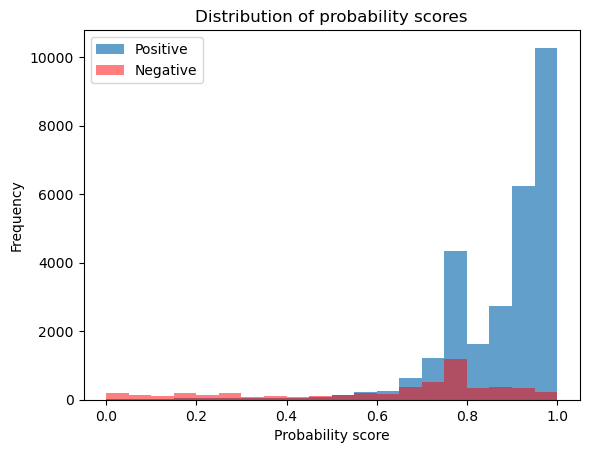

In [285]:
positive_probabilities_second = probabilities_second[:, 1][y_test == 1]
negative_probabilities_second = probabilities_second[:, 1][y_test == -1]

plt.hist(positive_probabilities_second, bins=20, label='Positive', alpha=0.7)
plt.hist(negative_probabilities_second, bins=20, label='Negative', color='red', alpha=0.5)
plt.xlabel('Probability score')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of probability scores')
plt.show()

In [286]:
probs_reviews_second = list(zip(predictions_second, test_df['review']))
probs_reviews_second.sort(key=lambda x: x[0])

num = 0
print("Most negative reviews:")
for i in probs_reviews_second[:5]:
    num += 1
    print(f"{num})\n {i[1]}\n")

print() 

num = 0
print("Most positive reviews:")
for i in probs_reviews_second[-5:]:
    num += 1
    print(f"{num})\n {i[1]}\n")

Most negative reviews:
1)
 This product created bites that were messy and too small  Also the cutter and top part that pushes out the pieces were impossible to get clean after using it on peanut butter cantaloupe watermelon and toast  The cleaning time took away from any benefit of having the bite size pieces  It is far easier and neater to do it yourself with a knife or to use any of the regular cookie cutter sizeshape cutters that are cuter and far easier to clean thoroughlyWhen I tried to return this to Funbites it had been purchased directly through them as a gift I was treated rudely and given a hassle  I was told to give the product to a friend or relative if I was not satisfied with it  What sense does that make  Why would I subject someone else to having to use a product that I didnt even like

2)
 I just purchased this and so far the experience has been no so greatFirst the power switch for the blender doesnt work right It doesnt seem to go off no matter what you doSecond the 

In [287]:
print("Accuracy of predictions: ", accuracy_score(y_test, predictions_second))

Accuracy of predictions:  0.869449191928278


In [288]:
#b)
for feature, coefficient in features_and_coefficients:
    print(f"{feature}: {coefficient}")

disappointed: -2.3502365302452364
return: -2.1697777603900845
waste: -2.033497513357338
broke: -1.7196312817840111
money: -0.9084611387030593
work: -0.6331122200545757
even: -0.5189343589682368
would: -0.34577618181830944
product: -0.3122389486741364
less: -0.1439962540437877
car: 0.057968871133269005
old: 0.08736832940245298
able: 0.18887582262258787
little: 0.4869238507492182
well: 0.49084866952076545
great: 0.9407149352497146
easy: 1.1609988973288667
love: 1.3279137102540837
perfect: 1.4670967566473758
loves: 1.723348326055684


In [297]:
#c)
print("First model fit")
%timeit -n 3 -r 2 model.fit(x_train, y_train)
print("First model predicition:")
%timeit -n 25 -r 5 model.predict(x_test)
print("Second model fitn:")
%timeit -n 3 -r 2 model_second.fit(x_train_second, y_train)
print("Second model predicition:")
%timeit -n 25 -r 5 model_second.predict(x_train_second)
#hint: %time, %timeit

First model fit


C:\Users\maury\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\maury\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

34.3 s ± 1.82 s per loop (mean ± std. dev. of 2 runs, 3 loops each)
First model predicition:
5.13 ms ± 562 µs per loop (mean ± std. dev. of 5 runs, 25 loops each)
Second model fitn:
170 ms ± 4.78 ms per loop (mean ± std. dev. of 2 runs, 3 loops each)
Second model predicition:
2.72 ms ± 197 µs per loop (mean ± std. dev. of 5 runs, 25 loops each)
